In [7]:
import pandas as pd
import glob
import collections
import seaborn as snsx
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

# Functions

In [3]:
tool_list=["optitype",'T1K','hlahd',"arcas",'hisat',"rna2hla","seq2hla","phlat","hlaforest","hlavbseq",'hlaminer']
my_order=["Optitype","T1K","HLA-HD","arcasHLA","HISAT","rna2HLA","seq2HLA","PHLAT","HLAforest","HLA-vbseq",'HLAminer']


missed_alleles = []

for t in tool_list:
    missed_alleles_caller = []
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
    
        ret = get_miscalled_alleles_only(pre,gs)
        missed_alleles_caller.append(ret)
    missed_alleles.append(missed_alleles_caller)



In [4]:
mis_total = []
all_total = np.array([1081, 1083, 1088, 1180, 980]) #5 element vector with # of gold standard A, B, C, DRB, and DQB

for tool in missed_alleles:
    mis_counts = [0,0,0,0,0]
    for d in tool:
        for allele in d:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
    mis_total.append(mis_counts)

print(mis_total)
percentage = mis_total/all_total
print(percentage)
accuracy = 1-percentage
print(accuracy)

[[3, 11, 4, 0, 0], [6, 12, 7, 17, 3], [4, 16, 29, 21, 4], [15, 16, 16, 7, 3], [22, 18, 55, 33, 14], [4, 23, 22, 80, 69], [4, 23, 22, 121, 69], [9, 63, 27, 29, 388], [16, 82, 14, 29, 26], [89, 123, 104, 1041, 936], [842, 918, 833, 885, 540]]
[[0.00277521 0.01015697 0.00367647 0.         0.        ]
 [0.00555042 0.01108033 0.00643382 0.01440678 0.00306122]
 [0.00370028 0.01477378 0.02665441 0.01779661 0.00408163]
 [0.01387604 0.01477378 0.01470588 0.0059322  0.00306122]
 [0.02035153 0.0166205  0.05055147 0.0279661  0.01428571]
 [0.00370028 0.0212373  0.02022059 0.06779661 0.07040816]
 [0.00370028 0.0212373  0.02022059 0.10254237 0.07040816]
 [0.00832562 0.05817175 0.02481618 0.02457627 0.39591837]
 [0.01480111 0.0757156  0.01286765 0.02457627 0.02653061]
 [0.08233117 0.11357341 0.09558824 0.88220339 0.95510204]
 [0.77890842 0.84764543 0.765625   0.75       0.55102041]]
[[0.99722479 0.98984303 0.99632353 1.         1.        ]
 [0.99444958 0.98891967 0.99356618 0.98559322 0.99693878]
 [0.

# Plots

In [5]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

,A,B,C,DRB1,DQB1
optitype,0.002775,0.010157,0.003676,0.000000,0.000000
T1K,0.005550,0.011080,0.006434,0.014407,0.003061
hlahd,0.003700,0.014774,0.026654,0.017797,0.004082
arcas,0.013876,0.014774,0.014706,0.005932,0.003061
hisat,0.020352,0.016620,0.050551,0.027966,0.014286
rna2hla,0.003700,0.021237,0.020221,0.067797,0.070408
seq2hla,0.003700,0.021237,0.020221,0.102542,0.070408
phlat,0.008326,0.058172,0.024816,0.024576,0.395918
hlaforest,0.014801,0.075716,0.012868,0.024576,0.026531
hlavbseq,0.082331,0.113573,0.095588,0.882203,0.955102


Text(0.5, 1.0, 'Two-field accuracy')

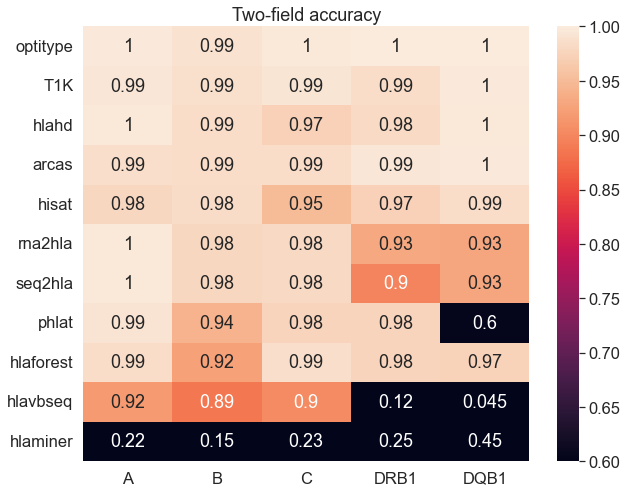

In [8]:
df = pd.DataFrame(accuracy)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)

from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df,annot=True,vmin=0.6,vmax=1)

plt.title('Two-field accuracy')